In [2]:
import pandas as pd

In [3]:
## Load the dataset

df = pd.read_csv("noshowappointments.csv")

In [4]:
## Preview first 5 rows

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
## View column names and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
## Clean column names

df.columns = df.columns.str.strip().str.lower().str.replace('-','_').str.replace(' ','_')

In [7]:
## Renaiming Columns Correctly

df.rename(columns={"hipertension":"hypertension", "handcap":"handicap", "no_show":"no_show_status"}, inplace = True)

## Change type to string
df['patientid'] = df['patientid'].astype(str)    


## Reviewing columns 

print(df.columns)

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show_status'],
      dtype='object')


In [8]:
## Convert date columns to datetime

df["scheduledday"] = pd.to_datetime(df["scheduledday"])
df["appointmentday"] = pd.to_datetime(df["appointmentday"])

## Extract date featured

df["appointment_day"] = df["appointmentday"].dt.date
df["appointment_weekday"] = df["appointmentday"].dt.day_name()
df["appointment_month"] = df["appointmentday"].dt.month
df["appointment_year"] = df["appointmentday"].dt.year

df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show_status',
       'appointment_day', 'appointment_weekday', 'appointment_month',
       'appointment_year'],
      dtype='object')

In [9]:
## Check missing values

print(df.isnull().sum())

patientid              0
appointmentid          0
gender                 0
scheduledday           0
appointmentday         0
age                    0
neighbourhood          0
scholarship            0
hypertension           0
diabetes               0
alcoholism             0
handicap               0
sms_received           0
no_show_status         0
appointment_day        0
appointment_weekday    0
appointment_month      0
appointment_year       0
dtype: int64


In [10]:
# Unique values in no_show
print(df["no_show_status"].value_counts())

# Check age distribution
print(df["age"].describe())


no_show_status
No     88208
Yes    22319
Name: count, dtype: int64
count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64


In [11]:
## Drop -ve ages
invalid_ages = df[df["age"] <= 0]
invalid_ages

## Drop -ve one
df = df[df["age"] >= 0]

In [12]:
df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show_status,appointment_day,appointment_weekday,appointment_month,appointment_year
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,Friday,4,2016
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,Friday,4,2016
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,Friday,4,2016
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,Friday,4,2016
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,Friday,4,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,2016-06-07,Tuesday,6,2016
110523,3596266328735.0,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,2016-06-07,Tuesday,6,2016
110524,15576631729893.0,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,2016-06-07,Tuesday,6,2016
110525,92134931435557.0,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,2016-06-07,Tuesday,6,2016


In [13]:
df[df['age'] == 0].sample(5)  # view 5 random records


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show_status,appointment_day,appointment_weekday,appointment_month,appointment_year
92186,11882796276143.0,5777883,M,2016-06-06 14:41:28+00:00,2016-06-07 00:00:00+00:00,0,SÃO BENEDITO,0,0,0,0,0,0,No,2016-06-07,Tuesday,6,2016
86785,2354185715317.0,5789986,M,2016-06-08 16:18:12+00:00,2016-06-08 00:00:00+00:00,0,DO MOSCOSO,0,0,0,0,0,0,Yes,2016-06-08,Wednesday,6,2016
85912,7293594978933.0,5769081,M,2016-06-03 08:21:58+00:00,2016-06-03 00:00:00+00:00,0,SANTA TEREZA,0,0,0,0,0,0,No,2016-06-03,Friday,6,2016
85480,4533381788559.0,5751594,M,2016-05-31 10:21:40+00:00,2016-06-06 00:00:00+00:00,0,CENTRO,0,0,0,0,0,1,Yes,2016-06-06,Monday,6,2016
14191,184541117773249.0,5754070,M,2016-05-31 15:22:02+00:00,2016-05-31 00:00:00+00:00,0,SEGURANÇA DO LAR,0,0,0,0,0,0,No,2016-05-31,Tuesday,5,2016


In [14]:
## Add column to insert infants where age = 0 
df['age_flag'] = df['age'].apply(lambda x: 'infant' if x == 0 else 'valid')


In [15]:
## Add column to check gap between scheduled day and appointment day
df['lead_time'] = (df['appointmentday'] - df['scheduledday']).dt.days

df[df["lead_time"] == -1]


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show_status,appointment_day,appointment_weekday,appointment_month,appointment_year,age_flag,lead_time
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,Friday,4,2016,valid,-1
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,Friday,4,2016,valid,-1
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,Friday,4,2016,valid,-1
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,Friday,4,2016,valid,-1
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,Friday,4,2016,valid,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110511,823599626588.0,5786742,F,2016-06-08 08:50:20+00:00,2016-06-08 00:00:00+00:00,14,MARIA ORTIZ,0,0,0,0,0,0,No,2016-06-08,Wednesday,6,2016,valid,-1
110512,98762456447375.0,5786368,F,2016-06-08 08:20:01+00:00,2016-06-08 00:00:00+00:00,41,MARIA ORTIZ,0,0,0,0,0,0,No,2016-06-08,Wednesday,6,2016,valid,-1
110513,86747784995281.0,5785964,M,2016-06-08 07:52:55+00:00,2016-06-08 00:00:00+00:00,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No,2016-06-08,Wednesday,6,2016,valid,-1
110514,2695685177138.0,5786567,F,2016-06-08 08:35:31+00:00,2016-06-08 00:00:00+00:00,58,MARIA ORTIZ,0,0,0,0,0,0,No,2016-06-08,Wednesday,6,2016,valid,-1


In [16]:
## Normalize date time to just compare days not time
df['scheduledday'] = pd.to_datetime(df['scheduledday']).dt.normalize()
df['appointmentday'] = pd.to_datetime(df['appointmentday']).dt.normalize()

df['lead_time'] = (df['appointmentday'] - df['scheduledday']).dt.days

df[df["lead_time"] < 0]


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show_status,appointment_day,appointment_weekday,appointment_month,appointment_year,age_flag,lead_time
27033,7839272661752.0,5679978,M,2016-05-10 00:00:00+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,2016-05-09,Monday,5,2016,valid,-1
55226,7896293967868.0,5715660,F,2016-05-18 00:00:00+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2016-05-17,Tuesday,5,2016,valid,-1
64175,24252258389979.0,5664962,F,2016-05-05 00:00:00+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2016-05-04,Wednesday,5,2016,valid,-1
71533,998231581612122.0,5686628,F,2016-05-11 00:00:00+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016-05-05,Thursday,5,2016,valid,-6
72362,3787481966821.0,5655637,M,2016-05-04 00:00:00+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,2016-05-03,Tuesday,5,2016,valid,-1


In [17]:
## Remove rows with lead_time less than 0
df = df[df['lead_time'] >= 0]

df[df["lead_time"] < 0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show_status,appointment_day,appointment_weekday,appointment_month,appointment_year,age_flag,lead_time


In [18]:
# Group by lead_time and no_show_status to count how many showed vs didn't show
lead_time_group = df.groupby(['lead_time', 'no_show_status']).size().unstack().fillna(0)

# Display a portion to inspect
print(lead_time_group.head(10))


no_show_status       No     Yes
lead_time                      
0               36770.0  1792.0
1                4100.0  1113.0
2                5123.0  1602.0
3                2093.0   644.0
4                4059.0  1231.0
5                2405.0   872.0
6                3036.0  1001.0
7                3597.0  1309.0
8                1662.0   670.0
9                1165.0   440.0


In [19]:
# Calculate % of no-shows for each lead_time
lead_time_group['no_show_rate'] = (lead_time_group['Yes'] / 
                                   (lead_time_group['Yes'] + lead_time_group['No'])) * 100

# View sorted by lead time
lead_time_group.reset_index().sort_values('lead_time').head(10)


no_show_status,lead_time,No,Yes,no_show_rate
0,0,36770.0,1792.0,4.647062
1,1,4100.0,1113.0,21.350470
2,2,5123.0,1602.0,23.821561
3,3,2093.0,644.0,23.529412
4,4,4059.0,1231.0,23.270321
5,5,2405.0,872.0,26.609704
6,6,3036.0,1001.0,24.795640
7,7,3597.0,1309.0,26.681614
8,8,1662.0,670.0,28.730703
9,9,1165.0,440.0,27.414330


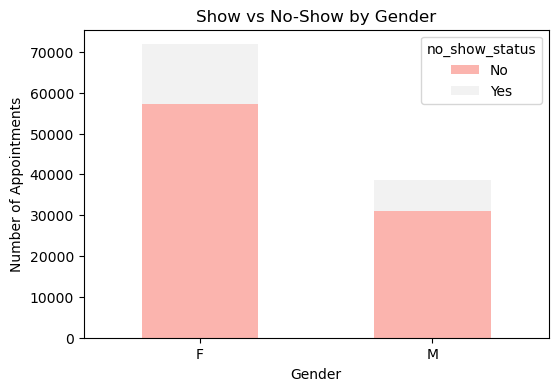

gender
F    20.311543
M    19.963810
dtype: float64


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped data
gender_counts = df.groupby(['gender', 'no_show_status']).size().unstack()

# Plot
gender_counts.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Pastel1')
plt.title('Show vs No-Show by Gender')
plt.ylabel('Number of Appointments')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

# No-show rate by gender
gender_noshow_rate = (gender_counts['Yes'] / gender_counts.sum(axis=1)) * 100
print(gender_noshow_rate)


In [21]:
# Create age groups (bins)
bins = [0, 12, 18, 35, 50, 65, 100, 120]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior', 'Elderly']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate no-show counts per age group
age_no_show = df.groupby(['age_group', 'no_show_status'], observed=False).size().unstack()

# Calculate no-show rate (%)
age_no_show['no_show_rate'] = (age_no_show['Yes'] / (age_no_show['Yes'] + age_no_show['No'])) * 100

print(age_no_show)


no_show_status     No   Yes  no_show_rate
age_group                                
Child           15909  4034     20.227649
Teen             5473  1962     26.388702
Young Adult     18432  5812     23.972942
Adult           17375  4489     20.531467
Middle Age      18849  3785     16.722630
Senior          12161  2229     15.489924
Elderly             8     3     27.272727


C:\Users\Salman\AppData\Local\Temp\ipykernel_17956\1343942364.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


In [22]:
# Group by neighbourhood and no_show_status
neighbourhood_no_show = df.groupby(['neighbourhood', 'no_show_status']).size().unstack(fill_value=0)

# Calculate no-show rate (%)
neighbourhood_no_show['no_show_rate'] = (neighbourhood_no_show['Yes'] / (neighbourhood_no_show['Yes'] + neighbourhood_no_show['No'])) * 100

# Sort by no_show_rate descending to find problem areas
neighbourhood_no_show = neighbourhood_no_show.sort_values(by='no_show_rate', ascending=False)

print(neighbourhood_no_show.head(10))  # Top 10 neighborhoods with highest no-show rate


no_show_status                 No  Yes  no_show_rate
neighbourhood                                       
ILHAS OCEÂNICAS DE TRINDADE     0    2    100.000000
SANTOS DUMONT                 907  369     28.918495
SANTA CECÍLIA                 325  123     27.455357
SANTA CLARA                   372  134     26.482213
ITARARÉ                      2591  923     26.266363
JESUS DE NAZARETH            2157  696     24.395373
HORTO                         133   42     24.000000
ILHA DO PRÍNCIPE             1734  532     23.477493
CARATOÍRA                    1974  591     23.040936
ANDORINHAS                   1741  521     23.032714


In [23]:
scholarship_no_show = df.groupby(['scholarship', 'no_show_status']).size().unstack()

scholarship_no_show['no_show_rate'] = (scholarship_no_show['Yes'] / (scholarship_no_show['Yes'] + scholarship_no_show['No'])) * 100

print(scholarship_no_show)


no_show_status     No    Yes  no_show_rate
scholarship                               
0               79924  19736     19.803331
1                8283   2578     23.736304


In [24]:
for condition in ['hypertension', 'diabetes', 'alcoholism', 'handicap']:
    cond_no_show = df.groupby([condition, 'no_show_status']).size().unstack()
    cond_no_show['no_show_rate'] = (cond_no_show['Yes'] / (cond_no_show['Yes'] + cond_no_show['No'])) * 100
    print(f"\nNo-show rate by {condition}:")
    print(cond_no_show)



No-show rate by hypertension:
no_show_status     No    Yes  no_show_rate
hypertension                              
0               70178  18542     20.899459
1               18029   3772     17.301959

No-show rate by diabetes:
no_show_status     No    Yes  no_show_rate
diabetes                                  
0               81694  20884     20.359141
1                6513   1430     18.003273

No-show rate by alcoholism:
no_show_status     No    Yes  no_show_rate
alcoholism                                
0               85524  21637     20.191114
1                2683    677     20.148810

No-show rate by handicap:
no_show_status     No    Yes  no_show_rate
handicap                                  
0               86373  21909     20.233280
1                1676    364     17.843137
2                 146     37     20.218579
3                  10      3     23.076923
4                   2      1     33.333333


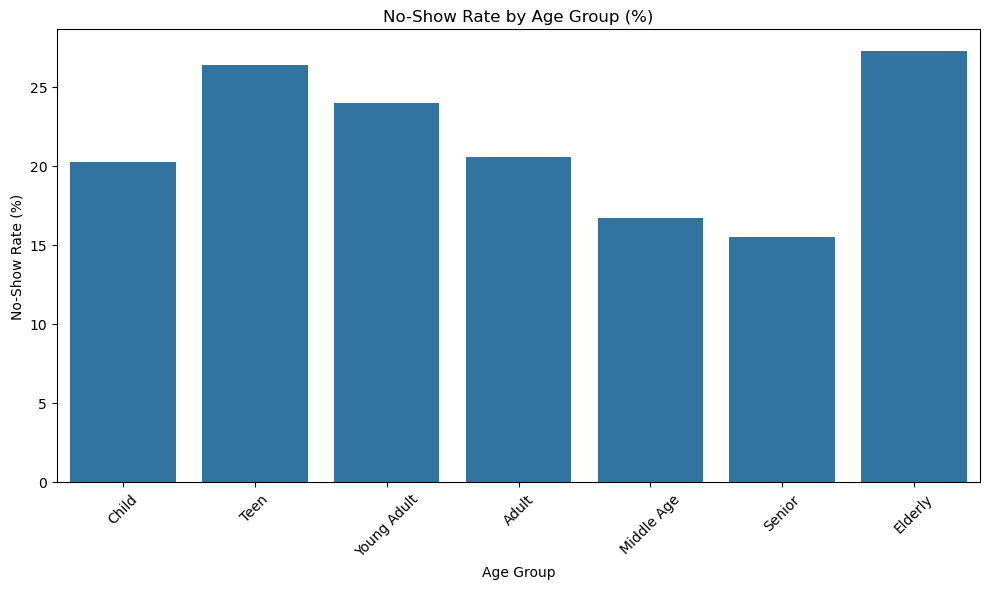

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x='age_group', y='no_show_rate', data=age_no_show)
plt.title('No-Show Rate by Age Group (%)')
plt.xlabel('Age Group')
plt.ylabel('No-Show Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
pip install mysql-connector-python sqlalchemy


Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
from sqlalchemy import create_engine

username = 'root'
password = '879189'
host = 'localhost'
port = '3306'
database = 'hospital_db'

# ✅ Create the connection string
connection_string = f"mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}"

# ✅ Create the engine
engine = create_engine(connection_string)

# ✅ Upload DataFrame (replace 'hospital_appointments' with your table name)
df.to_sql(name='hospital_appointments', con=engine, if_exists='append', index=False)

print("✅ Data inserted successfully!")


✅ Data inserted successfully!


In [30]:
df.to_csv('hospital_cleaned_data.csv', index=False)
